# Coderdojo AI Digit Recognition

https://en.wikipedia.org/wiki/MNIST_database

## Build a Machine Learning Model to learn to recognise hand written numbers (digits).

## What you will Learn

<img src="https://929687.smushcdn.com/2633864/wp-content/uploads/2021/03/keras_tuner_header.png" width="200" height="100" align="left">

#### * How to represent Digits in Python
#### * How to build a Machine Learning model that predicts what number is being represented in a 24x24 image
#### * How to build, train and validate Machine Learning models in Keras / Tensorflow2


## What you will do
* Load the MNIST dataset. It contains images in X and the corresponding Label in y.
* Develop a Neural Network (model) in Keras / Tensorflow2
* Test how well your model works on unseen (Test) data
* Examine some wrong results to see why they might be wrong
* Improve the model by hyper-parameter tuning, implement a CNN model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Load the Data Set
* It's divided into a Training Set and a Test Set. Do you know why?
* Take a look here
<img src="https://learn.g2.com/hs-fs/hubfs/training%20data%20vs.%20validation%20data%20vs.%20test%20data%20-1.png?width=600&name=training%20data%20vs.%20validation%20data%20vs.%20test%20data%20-1.png" width="200" height="100">
** https://learn.g2.com/training-data

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### What are the dimensions and type of the data ?
* --- complete the cell below to find out ---

In [3]:
print(f'{X_train.shape}: X_train \t {X_test.shape} : X_test')
print(f'{y_train.shape}: y_train \t {y_test.shape} : y_test')

(60000, 28, 28): X_train 	 (10000, 28, 28) : X_test
(60000,): y_train 	 (10000,) : y_test


#### How many data examples are there ?
* --- complete the cell below to find out ---

In [4]:
print(f'{X_train.shape[0]}: Xtrain \t {X_test.shape[0]} : Xtest')

60000: Xtrain 	 10000 : Xtest


### The data represents images of numbers and what number they are

<img src="https://miro.medium.com/max/4800/1*S8SOaXqMl8CRbnDZFezyrA.jpeg" width="400" heght="200">
<img src="https://static.javatpoint.com/tutorial/tensorflow/images/mnist-dataset-in-cnn3.png" width="400" heght="200" >

* Take a look at the data to check that out
* Can you find that representation in the data ?
* -- answer --

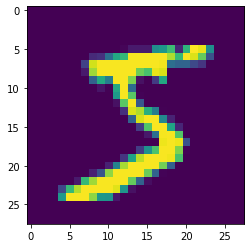

In [5]:
plt.imshow(X_train[0])


Plot first 25 Training Examples


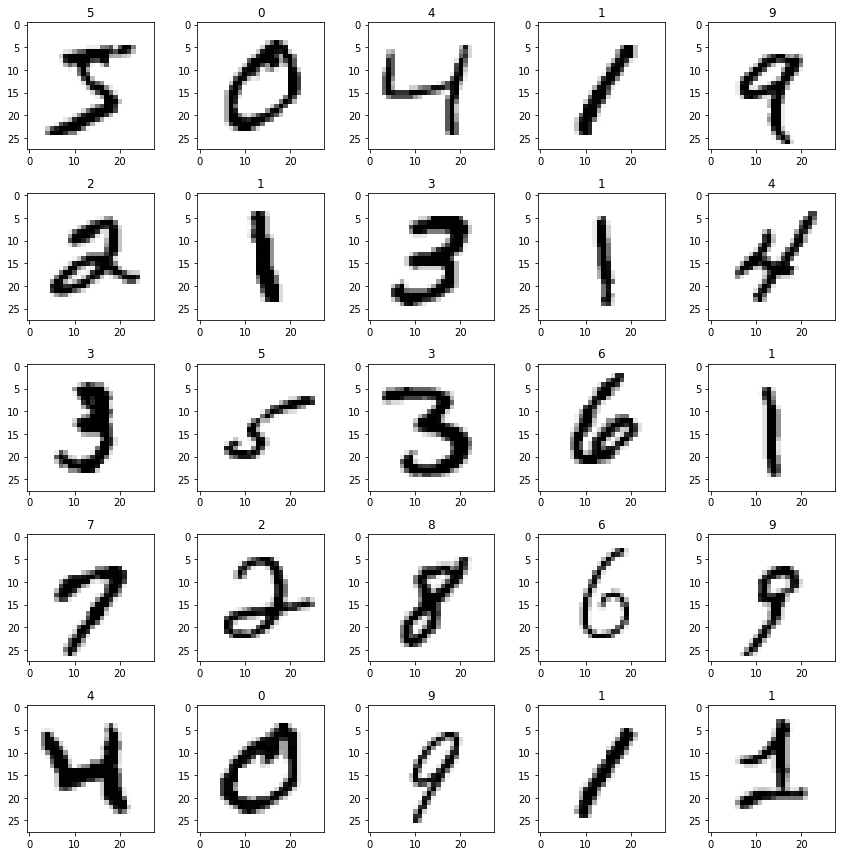

In [6]:
# Plot the first 25 training examples with their training labels
print('Plot first 25 Training Examples')

plt.figure(figsize=(12, 12))

for i in np.arange(25):
    plt.subplot(5,5,i+1)
    plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='gray_r')

plt.tight_layout()

# Instead of plotting the first 25 Training Examples, 
# can you plot the last 25? 
# can you plot 25 random examples?

# MultiClass Classification

## KERAS NN Implementation

In [7]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

#### What values are in the labels (i.e.  y_train, y_test) ?
#### Can you convert them to one hot (also called categorical) ?
https://www.educative.io/answers/how-to-perform-one-hot-encoding-using-keras
* --- complete the cell below ---

In [8]:
# one hot encode outputs
y_train_c = np_utils.to_categorical(y_train)
y_test_c = np_utils.to_categorical(y_test)

#### We want to build a Neural Network with a Flat, Fully Connected Input
* What dimensions are the X data?
* -- answer --
* Write the code to flatten the X_train and X_test data in the cell below

In [9]:
X_train_flat = np.reshape(X_train,(-1,784))
X_test_flat = np.reshape(X_test,(-1,784))

## Build a two-layer Neural network using Keras

<img src="https://miro.medium.com/max/1000/1*TOvV6GRyJHbL7IWYFGjEqQ.png" width="400" heght="200">


https://keras.io/guides/sequential_model/
* One Hidden (Dense or fully Connected) Layer
* One Output Layer

#### How many categories of digit are there?
* -- answer --
#### Considering what you just answered, what dimension should the output layer be?
* -- answer --

#### Make the hidden layer 20 wide
* -- complete the cell below -- with the input dimension and layer width
** take a look at the documentation linked just above


In [10]:
# Build Model
model = Sequential()
model.add(Dense(20, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model in Keras
* What's the command to compile the Keras Model ?
* https://keras.io/api/models/model_training_apis/

* -- complete the cell below --

In [12]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fit the Model Keras

In [13]:
# Fit Model
history = model.fit(X_train_flat, y_train_c, validation_data=(X_test_flat, y_test_c), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 1s - loss: 1.4089 - accuracy: 0.6955 - val_loss: 0.5106 - val_accuracy: 0.8636 - 947ms/epoch - 3ms/step
Epoch 2/10
300/300 - 0s - loss: 0.4048 - accuracy: 0.8854 - val_loss: 0.3458 - val_accuracy: 0.9019 - 483ms/epoch - 2ms/step
Epoch 3/10
300/300 - 1s - loss: 0.3005 - accuracy: 0.9118 - val_loss: 0.2907 - val_accuracy: 0.9182 - 504ms/epoch - 2ms/step
Epoch 4/10
300/300 - 0s - loss: 0.2559 - accuracy: 0.9244 - val_loss: 0.2488 - val_accuracy: 0.9317 - 474ms/epoch - 2ms/step
Epoch 5/10
300/300 - 0s - loss: 0.2252 - accuracy: 0.9346 - val_loss: 0.2348 - val_accuracy: 0.9343 - 421ms/epoch - 1ms/step
Epoch 6/10
300/300 - 0s - loss: 0.2004 - accuracy: 0.9413 - val_loss: 0.2072 - val_accuracy: 0.9408 - 417ms/epoch - 1ms/step
Epoch 7/10
300/300 - 0s - loss: 0.1829 - accuracy: 0.9462 - val_loss: 0.2141 - val_accuracy: 0.9422 - 444ms/epoch - 1ms/step
Epoch 8/10
300/300 - 0s - loss: 0.1694 - accuracy: 0.9498 - val_loss: 0.1964 - val_accuracy: 0.9452 - 442ms/epoch - 1ms/step


In [14]:
# Evaluate the model
scores = model.evaluate(X_test_flat, y_test_c, verbose=0)
print("Accuracy: %.2f%%" % (100*scores[1]))

Accuracy: 94.49%


#### How do you know if your trained model predicts well on unseen data ?
* answer
#### What variables in this notebook contain the unseen data?
* answer
#### Produce a classification report
* --- code below ----

In [15]:
print(metrics.classification_report(y_test, np.argmax(model.predict(X_test_flat),axis=1)),'\n')

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.91      0.93      1032
           3       0.96      0.95      0.95      1010
           4       0.92      0.96      0.94       982
           5       0.93      0.94      0.93       892
           6       0.96      0.95      0.96       958
           7       0.92      0.96      0.94      1028
           8       0.95      0.90      0.92       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000
 



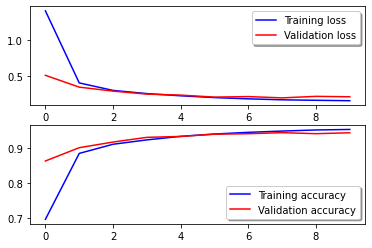

In [16]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Take a look at some Wrongly Predicted Test Examples
* -- complete the code below --

In [17]:
# predict some test digit labels
y_pred = model.predict(X_test_flat)

#### Take a look at the predictions. What are they?
* -- answer --
* add the required code to make them into labels (0 to 9)

In [18]:
y_pred = np.argmax(model.predict(X_test_flat),axis=1)

#### How many examples are in the test set?
* -- write some code and answer -- 
#### How many predictions did the model get wrong ?
* -- write some code and answer -- 
#### Calculate the accuracy
* -- write some code and answer -- 

In [19]:
print(f'{y_test.shape[0]} test examples \t {np.sum(y_pred!=y_test)} Wrong Predictions \n')
print(f'Accuracy {100 - 100*np.sum(y_pred!=y_test)/y_test.shape[0]}%')

10000 test examples 	 551 Wrong Predictions 

Accuracy 94.49%


In [20]:
# Matrix of wrong examples
X_wrong = X_test[y_pred != y_test]
y_wrong_pred = y_pred[y_pred != y_test]
y_wrong_test = y_test[y_pred != y_test]

Text(0.5, 1.0, 'Ind: 251 Prediction: 5  Test Label 6')

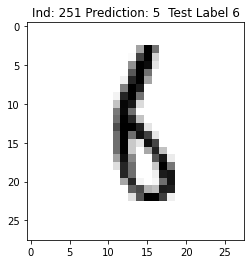

In [21]:
# Plot one
ind = np.random.choice(len(y_wrong_pred))
plt.imshow(X_wrong[ind], cmap='gray_r')
plt.title(f'Ind: {ind} Prediction: {y_wrong_pred[ind]}  Test Label {y_wrong_test[ind]}')

# What's Next
* Can you improve the model?
* - Are the hyper parameters setup to get the best results ?
* - Is there a better model architecture ?
* Can you design a Convolutional Neural Network (CNN) in Keras ?
* Is it better ?

https://keras.io/guides/keras_tuner/getting_started/
